# Data loading and Overview

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
#import plotly.express as px
#import plotly.graph_objects as go
#from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set styling
#print(plt.style.available)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

# Load the dataset
df = pd.read_csv('../data/raw/london_merged.csv')

# Display basic information
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
display(df.head())

# Check data types and missing values
print("\nData types:")
display(df.dtypes)

print("\nMissing values:")
display(df.isnull().sum())

# Summary statistics
print("\nSummary statistics:")
display(df.describe())

Dataset shape: (17414, 10)

First few rows:


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0



Data types:


timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object


Missing values:


timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64


Summary statistics:


,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


# Time Series Preprocessing

In [5]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract time components
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['date'] = df['timestamp'].dt.date

# Check the time range
print(f"Time range: {df['timestamp'].min()} to {df['timestamp'].max()}")
print(f"Total duration: {(df['timestamp'].max() - df['timestamp'].min()).days} days")

Time range: 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Total duration: 730 days


# Target Variable Analysis

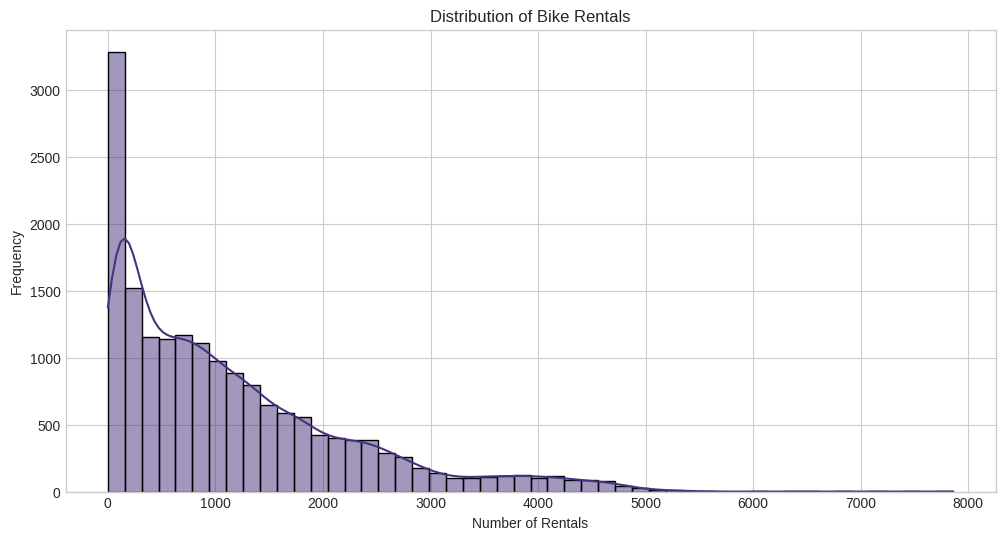

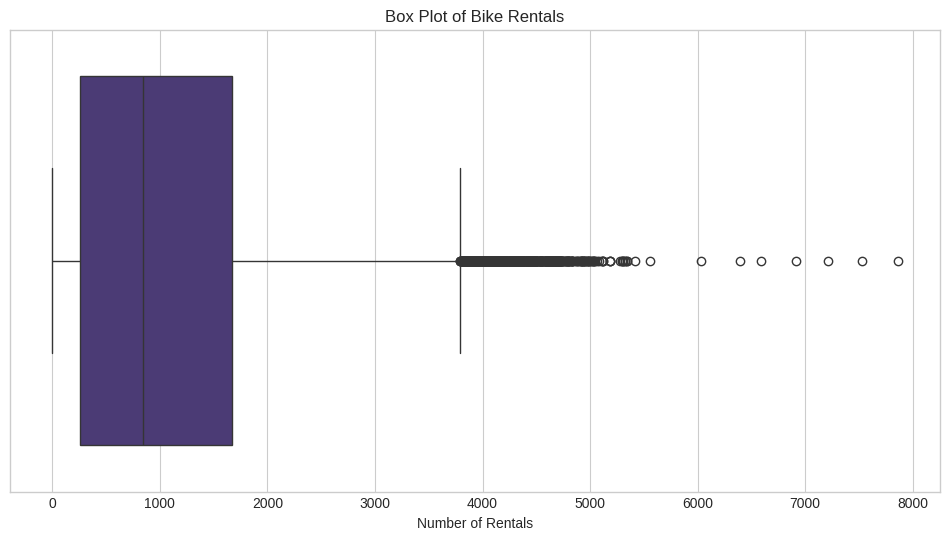

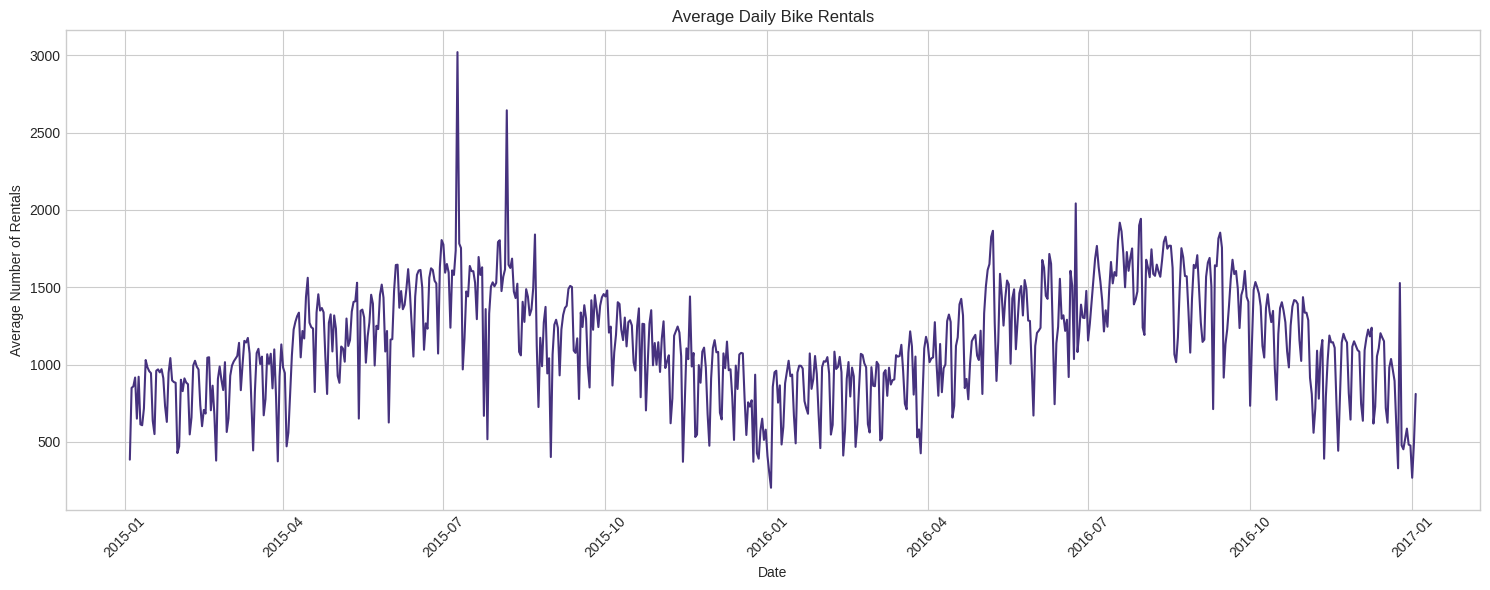

In [6]:
# Distribution of bike rentals
plt.figure(figsize=(12, 6))
sns.histplot(df['cnt'], bins=50, kde=True)
plt.title('Distribution of Bike Rentals')
plt.xlabel('Number of Rentals')
plt.ylabel('Frequency')
plt.show()

# Box plot of bike rentals
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['cnt'])
plt.title('Box Plot of Bike Rentals')
plt.xlabel('Number of Rentals')
plt.show()

# Time series plot of bike rentals (daily average)
daily_rentals = df.groupby('date')['cnt'].mean().reset_index()
plt.figure(figsize=(15, 6))
plt.plot(daily_rentals['date'], daily_rentals['cnt'])
plt.title('Average Daily Bike Rentals')
plt.xlabel('Date')
plt.ylabel('Average Number of Rentals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()